In [2]:
import cv2 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import os

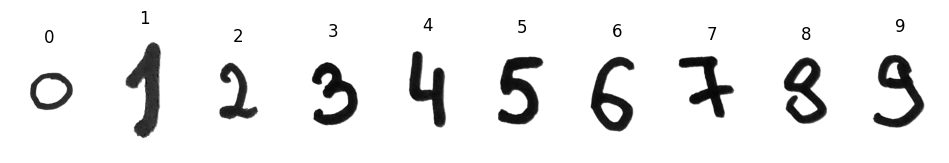

In [3]:
folder = '/kaggle/input/digitsdata'
files = sorted([f for f in os.listdir(folder) if f.endswith('.png')])  # sort 0-9

images = []

for f in files:
    path = os.path.join(folder, f)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) # open each image as array of gray colors
    if img is not None: # in we opened it succesfully we append our array
        images.append(img) 

# Preview of handwritten digits
fig, axes = plt.subplots(1, len(images), figsize=(12, 3)) # 1 - one row and and columns as our images
for i, ax in enumerate(axes): # cycle that do next code for all table elements
    ax.imshow(images[i], cmap='gray') # shows image in gray palette 
    ax.axis('off') # removes our coordinates
    ax.set_title(f'{files[i].split(".")[0]}')  # adds title (title is name of our files)
plt.show()


   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel_8  pixel_9  ...  pixel_391  pixel_392  pixel_393  pixel_394  \
0        0        0  ...          0          0          0          0   
1        0        0  ...          0          0          0          0   
2        0        0  ...          0          0          0          0   
3        0        0  ...          0          0          0          0   
4        0        0  ...          0          0          0          0   

   pixel_395  pixel_396  pixel_397  pixel_398  pixel_399  target  
0          0          0          0   

<function matplotlib.pyplot.show(close=None, block=None)>

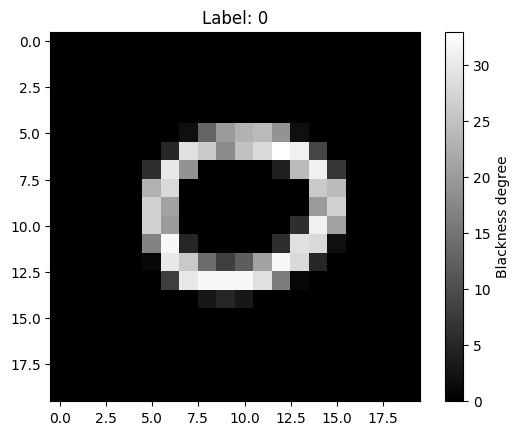

In [4]:
processed_images = []
labels = []

for i, img in enumerate(images):
    resized = cv2.resize(img, (20,20), interpolation=cv2.INTER_AREA) # compress image to 20x20
    inverted = 255 - resized
    normalized = (inverted / 255 * 40).astype(int)

    processed_images.append(normalized.flatten()) # converting matrix to row
    labels.append(int(files[i].split('.')[0])) # labels




df = pd.DataFrame(data=processed_images, columns=[f'pixel_{i}' for i in range(400)])
df['target'] = labels

print(df.head())
print(df.info())

plt.imshow(processed_images[0].reshape(20,20), cmap='gray')
plt.title(f"Label: {labels[0]}")
plt.colorbar(label="Blackness degree")
plt.show

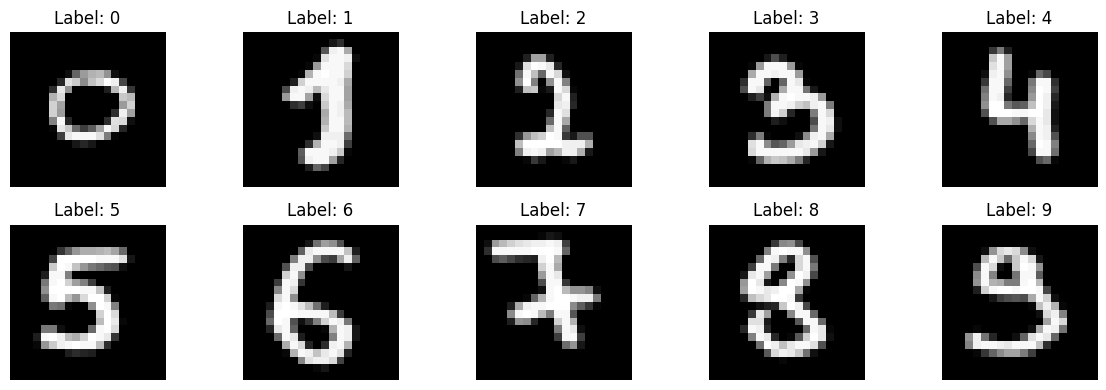

In [5]:
import matplotlib.pyplot as plt

num_images = len(df)
cols = 5
rows = (num_images + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, 2*rows))

for i in range(num_images):
    ax = axes[i//cols, i%cols]
    img_array = df.iloc[i, :-1].values.reshape(20, 20)
    ax.imshow(img_array, cmap='gray')
    ax.set_title(f"Label: {df.iloc[i, -1]}")
    ax.axis('off')

# hide empty axes
for j in range(num_images, rows*cols):
    axes[j//cols, j%cols].axis('off')

plt.tight_layout()
plt.show()


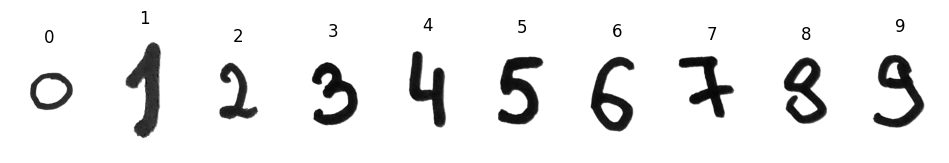

In [6]:
fig, axes = plt.subplots(1, len(images), figsize=(12, 3))
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'{files[i].split(".")[0]}')  # show digit
plt.show()

In [7]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import math
import numpy as np

def plot_knn_results(X, y, neighbors=3, images=None, files=None):
    """
    Train KNN and visualize predictions.
    
    Parameters:
    - X: np.array, features (num_samples x num_features)
    - y: np.array or list, labels
    - neighbors: int, number of neighbors for KNN
    - images: list or array of images to display (optional)
    - files: list of filenames corresponding to images (optional)
    
    Returns:
    - knn: trained KNN model
    - y_pred: predictions
    """
    # Train KNN
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    
    # If separate images/files provided, show them first
    if images is not None and files is not None:
        fig, axes = plt.subplots(1, len(images), figsize=(12, 3))
        axes = axes.flatten()
        for i, ax in enumerate(axes):
            ax.imshow(images[i], cmap='gray')
            ax.axis('off')
            ax.set_title(f'{files[i].split(".")[0]}')
        plt.tight_layout()
        plt.show()
    
    # Plot actual vs predicted
    num_images = len(X)
    cols = 5
    rows = math.ceil(num_images / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(12, 2*rows))
    axes = axes.flatten()
    
    for i in range(num_images):
        img = X[i].reshape(20, 20)
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"A:{y[i]} P:{y_pred[i]}")
        axes[i].axis('off')
    
    for j in range(num_images, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Count correct predictions
    correct = np.sum(y_pred == y)
    total = len(y)
    print(f"Accuracy: {correct} of {total} correct")
    
    return knn, y_pred


In [11]:
import os
import glob
import cv2
import numpy as np

X = []
y = []

train_folder = '/kaggle/input/handwritten-digits-0-9'

for label_folder in sorted(os.listdir(train_folder)):
    folder_path = os.path.join(train_folder, label_folder)
    if os.path.isdir(folder_path):
        files = glob.glob(os.path.join(folder_path, '*.jpg')) + glob.glob(os.path.join(folder_path, '*.png'))
        for f in files[:50]:  # optional limit for speed
            img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img_resized = cv2.resize(img, (20, 20))
                X.append(img_resized.flatten() / 255.0)
                y.append(label_folder)

X = np.array(X, dtype=np.float32)
y = np.array(y)
print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (500, 400), y shape: (500,)


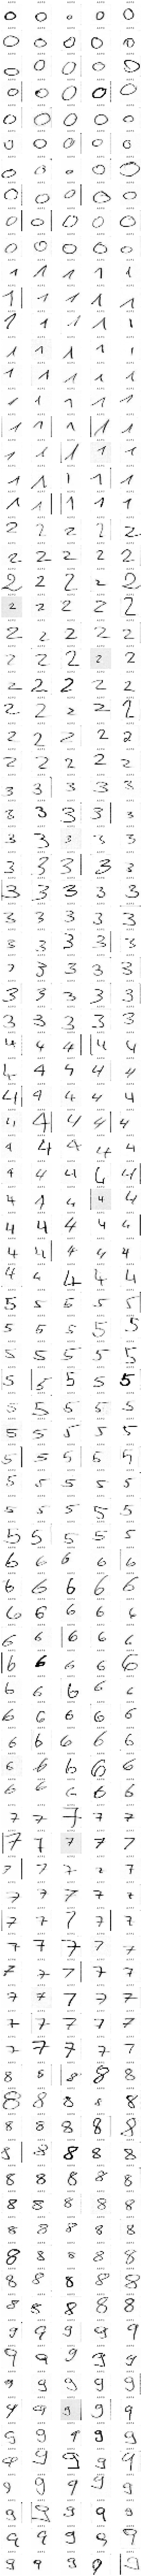

Accuracy: 266 of 500 correct


In [12]:
knn_model, predictions = plot_knn_results(X, y, neighbors=4)

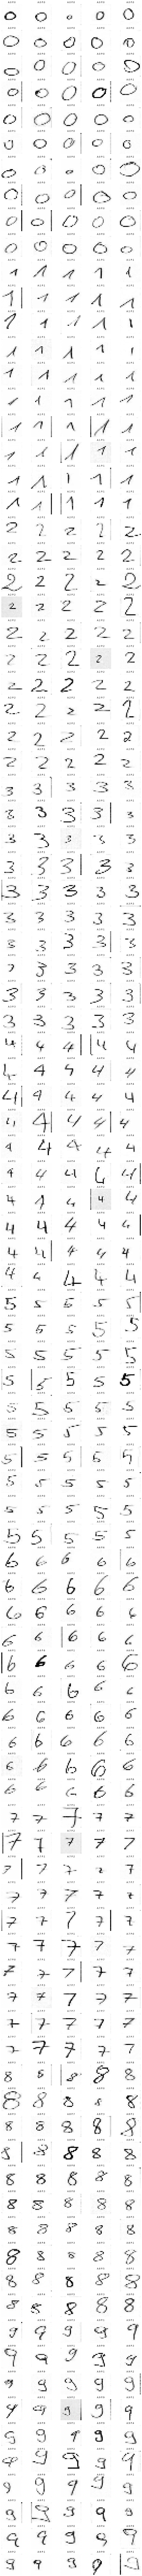

Accuracy: 290 of 500 correct


In [13]:
knn_model, predictions = plot_knn_results(X, y, neighbors=3)

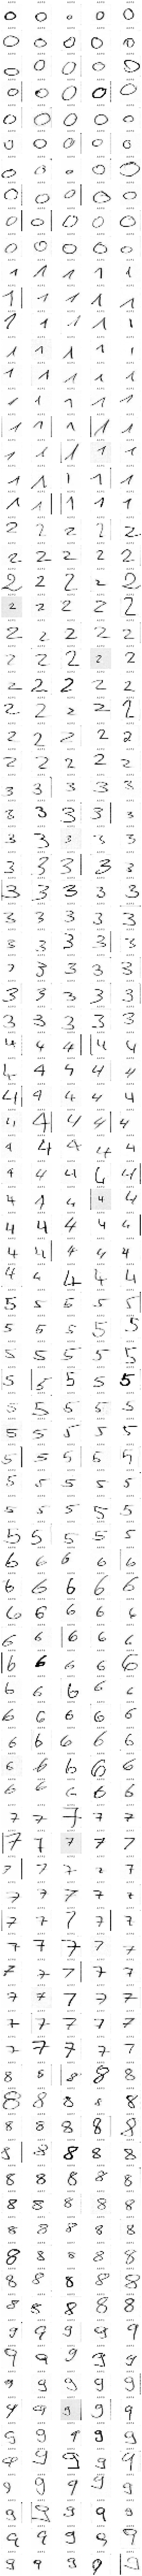

Accuracy: 302 of 500 correct


In [14]:
knn_model, predictions = plot_knn_results(X, y, neighbors=2)

In [16]:
import glob
import random

base_folder = '/kaggle/input/handwritten-digits-0-9'
img_size = (20, 20)
neighbors = 3
max_per_class = 2000

X = []
y = []

for label_folder in sorted(os.listdir(base_folder)):
    folder_path = os.path.join(base_folder, label_folder)
    if os.path.isdir(folder_path):
        files = glob.glob(os.path.join(folder_path, '*.jpg')) + glob.glob(os.path.join(folder_path, '*.png'))
        random.shuffle(files) 
        files = files[:max_per_class]  
        for f in files:
            img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img_resized = cv2.resize(img, img_size)
                X.append(img_resized.flatten()/255.0)
                y.append(label_folder)

X = np.array(X, dtype=np.float32)
y = np.array(y)

print(f"Loaded {len(X)} images, classes: {np.unique(y)}")

knn = KNeighborsClassifier(n_neighbors=neighbors, weights='distance', metric='euclidean')
knn.fit(X, y)

print("KNN training complete.")


Loaded 20000 images, classes: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
KNN training complete.


In [17]:
def predict_from_files(knn, files):
    X = []
    images = []

    for f in files:
        img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img_resized = cv2.resize(img, (20, 20))
            X.append(img_resized.flatten()/255.0)
            images.append(img_resized)

    X = np.array(X, dtype=np.float32)
    
    # Передбачення
    y_pred = knn.predict(X)

    # Показуємо всі зображення з підписами
    if len(images) > 0:
        cols = min(5, len(images))
        rows = -(-len(images)//cols)  # округлення вгору
        fig, axes = plt.subplots(rows, cols, figsize=(12, 2*rows))
        axes = axes.flatten()
        for i, ax in enumerate(axes):
            if i < len(images):
                ax.imshow(images[i], cmap='gray')
                ax.set_title(f'{os.path.basename(files[i]).split(".")[0]}')
            ax.axis('off')
        plt.tight_layout()
        plt.show()

    return y_pred


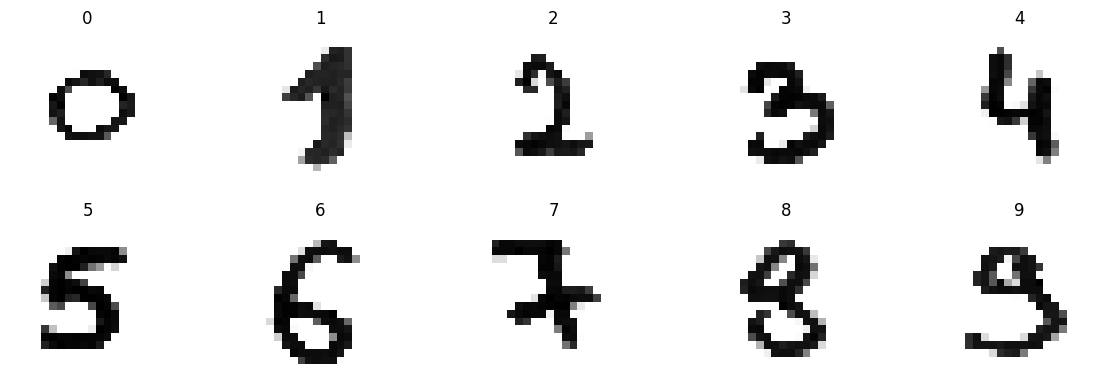

Predictions: ['0' '9' '2' '3' '9' '9' '6' '7' '3' '9']


In [18]:
files_array = [
    '/kaggle/input/digitsdata/0.png',
    '/kaggle/input/digitsdata/1.png',
    '/kaggle/input/digitsdata/2.png',
    '/kaggle/input/digitsdata/3.png',
    '/kaggle/input/digitsdata/4.png',
    '/kaggle/input/digitsdata/5.png',
    '/kaggle/input/digitsdata/6.png',
    '/kaggle/input/digitsdata/7.png',
    '/kaggle/input/digitsdata/8.png',
    '/kaggle/input/digitsdata/9.png'
]

y_pred = predict_from_files(knn, files_array)
print("Predictions:", y_pred)

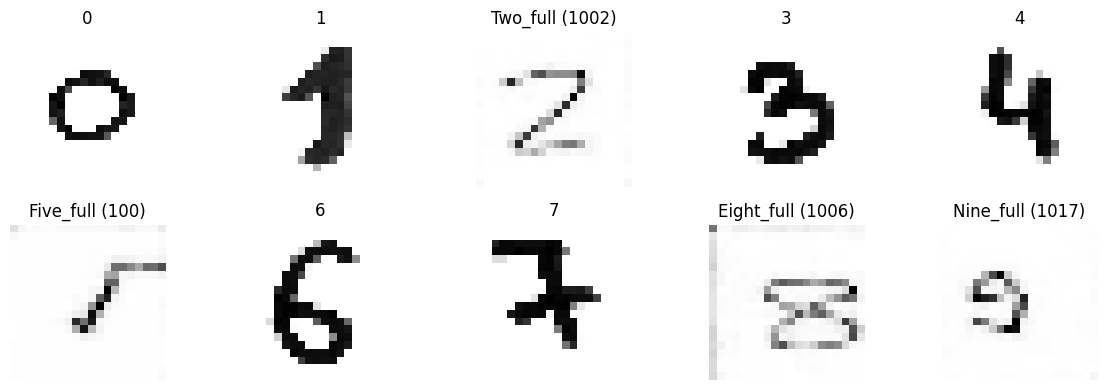

Predictions: ['0' '9' '2' '3' '9' '5' '6' '7' '8' '9']


In [19]:
files_array = [
    '/kaggle/input/digitsdata/0.png',
    '/kaggle/input/digitsdata/1.png',
    '/kaggle/input/handwritten-digits-0-9/2/Two_full (1002).jpg',
    '/kaggle/input/digitsdata/3.png',
    '/kaggle/input/digitsdata/4.png',
    '/kaggle/input/handwritten-digits-0-9/5/Five_full (100).jpg',
    '/kaggle/input/digitsdata/6.png',
    '/kaggle/input/digitsdata/7.png',
    '/kaggle/input/handwritten-digits-0-9/8/Eight_full (1006).jpg',
    '/kaggle/input/handwritten-digits-0-9/9/Nine_full (1017).jpg'
]

y_pred = predict_from_files(knn, files_array)
print("Predictions:", y_pred)

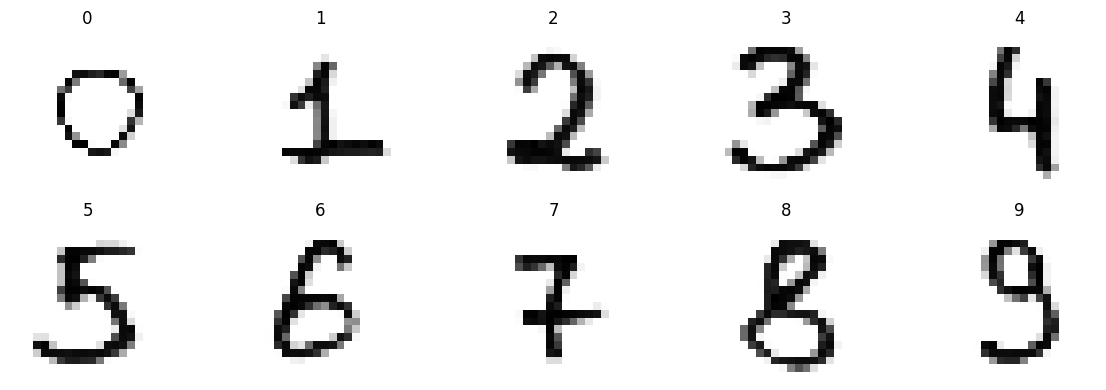

Predictions: ['8' '9' '2' '3' '9' '5' '6' '7' '8' '9']


In [20]:
files_array = [
    '/kaggle/input/digits2/0.png',
    '/kaggle/input/digits2/1.png',
    '/kaggle/input/digits2/2.png',
    '/kaggle/input/digits2/3.png',
    '/kaggle/input/digits2/4.png',
    '/kaggle/input/digits2/5.png',
    '/kaggle/input/digits2/6.png',
    '/kaggle/input/digits2/7.png',
    '/kaggle/input/digits2/8.png',
    '/kaggle/input/digits2/9.png'
]

y_pred = predict_from_files(knn, files_array)
print("Predictions:", y_pred)

| Neighbors | Correct / Total | Accuracy (%)|
|-----------|----------------|--------------|
| 4         | 266 / 500      | 53.2%        |
| 3         | 290 / 500      | 58.0%        |
| 3 (rerun) | 302 / 500      | 60.4%        |

# Final training: Trained KNN on 20,000 images with 3 neighbors. Based on tran accuracy check 


| Image | Actual | Pred 1 | Pred 2 | Pred 3 |
| ----- | ------ | ------ | ------ | ------ |
| 1     | 0      | 0      | 0      | 8      |
| 2     | 1      | 9      | 9      | 9      |
| 3     | 2      | 2      | 2      | 2      |
| 4     | 3      | 3      | 3      | 3      |
| 5     | 4      | 9      | 9      | 9      |
| 6     | 5      | 9      | 5      | 5      |
| 7     | 6      | 6      | 6      | 6      |
| 8     | 7      | 7      | 7      | 7      |
| 9     | 8      | 3      | 8      | 8      |
| 10    | 9      | 9      | 9      | 9      |


# General Pattern Across All Predictions

# Frequently Misclassified Digits

| Digit | Number of Misclassifications | Predicted As |
|-------|-----------------------------|--------------|
| 0     | 1/3                         | 8            |
| 1     | 3/3                         | 9            |
| 4     | 3/3                         | 9            |
| 5     | 1/3                         | 9            |


## Digits that are consistently predicted correctly: 2, 3, 6, 7, 8, 9 (except small variations).

## Tendency: The KNN model tends to predict “9” for ambiguous shapes, likely because 9 is visually similar to several digits depending on handwriting.

